In [3]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Populating the interactive namespace from numpy and matplotlib


In [4]:
c1 = pd.read_sas('communication.sas7bdat')
c1.drop('CONTID', axis=1, inplace=1)
c1

,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,CI,CTS,CT,0000020,O,1994-05-09
1,CI,CTS,CT,0000020,O,1994-06-14
2,CI,CTS,CT,0000020,O,1994-10-21
3,CI,CTS,CT,0000020,O,1994-10-21
4,CI,CTS,CT,0000020,O,1994-11-28
5,LE,TAX,ID,0000020,O,1995-02-24
6,CI,CTS,CT,0000020,O,1995-05-30
7,CI,CTS,CT,0000020,O,1995-07-03
8,CI,CTS,CT,0000020,O,1995-07-10
9,CI,CTS,CT,0000020,O,1995-08-19


In [5]:
e1 = pd.read_sas('extrel.sas7bdat')
e1.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


In [6]:
e2 = pd.read_sas('nameaddr.sas7bdat')
e2.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


In [7]:
py = pd.read_sas('payhistory.sas7bdat')
py.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


# Making a list of active customers

In [8]:
final = e1[(e1['EXRELACTCD']=='FP') & (~(e1['EXRELDATEN'] <'2006-01-01')) & (e1['EXTRELSTDT']<'2005-12-03')]

In [9]:
final['Churn'] = np.where(final['EXRELDATEN'].isnull(), 0, 1)
final['STARTYEAR'] = map(lambda x: x.year, final['EXTRELSTDT'])

C:\ProgramData\Anaconda2.1\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda2.1\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


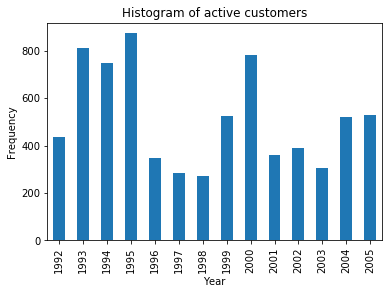

In [10]:
count= final['STARTYEAR'].value_counts()
axes = count.sort_index().plot.bar()
axes.set_xlabel('Year')
axes.set_ylabel('Frequency')
axes.set_title('Histogram of active customers')

# Calculating RECENCY, FREQUENCY & MONETARY VALUE
* m1 = Count of PAMT
* m2 = Average of PAMT
* m3 = Total of PAMT
* m4 = Last Payment date
* m5 = Last Communication info

In [11]:
m1 = pd.DataFrame(py.pivot_table(index='EXTRELNO', values='PAMT', aggfunc='count'))
m2 = pd.DataFrame(py.pivot_table(index='EXTRELNO', values='PAMT', aggfunc='mean'))
m3 = pd.DataFrame(py.pivot_table(index='EXTRELNO', values='PAMT', aggfunc='sum'))
m4 = py.sort_values(ascending=0, by='PDATE').groupby('EXTRELNO')['PDATE'].nth(0)
m5 = c1.sort_values(ascending=0, by='CONTDATE').groupby('EXTRELNO').nth(0)

In [12]:
m = pd.concat([m1,m2,m3,m4,m5], axis=1)
m_nw= m.reset_index()
m_nw.columns=['EXTRELNO', 'PAMT_COUNT', 'PAMT_MEAN', 'PAMT_SUM', 'RECENT_TRANSACTION', 
              'CLASCODE', 'CONTDATE', 'CONTDIREC', 'MEDIUMCODE', 'MNTOPCODE']
m_nw

,EXTRELNO,PAMT_COUNT,PAMT_MEAN,PAMT_SUM,RECENT_TRANSACTION,CLASCODE,CONTDATE,CONTDIREC,MEDIUMCODE,MNTOPCODE
0,0000019,1.0,9.570000,9.57,1993-12-31,NaN,NaT,NaN,NaN,NaN
1,0000020,158.0,20.107405,3176.97,2007-01-17,CT,2006-08-10,O,CI,CTS
2,0000035,155.0,20.441290,3168.40,2007-01-17,CT,2006-10-03,O,CI,CTS
3,0000042,85.0,18.153294,1543.03,2001-01-23,RI,2001-03-29,I,LE,DIS
4,0000043,229.0,19.097118,4373.24,2003-07-14,ID,2004-01-23,O,LE,TAX
5,0000060,76.0,17.543816,1333.33,1999-12-07,ID,2000-02-12,O,LE,TAX
6,0000072,59.0,52.729831,3111.06,2006-11-10,CT,2006-10-05,O,CI,CTS
7,0000081,171.0,54.436901,9308.71,2006-12-08,CT,2006-12-26,O,CI,CTS
8,0000089,157.0,20.085796,3153.47,2007-01-17,CT,2006-10-31,O,CI,CTS
9,0000091,117.0,19.560342,2288.56,2003-09-15,ID,2004-01-23,O,LE,TAX


# Merging active customers data, RFM data and customers demography

In [13]:
base1 = (pd.merge(pd.merge(final,m_nw), e2))

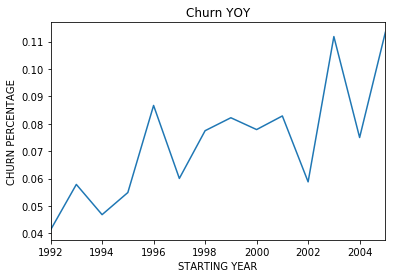

In [14]:
axes = base1.pivot_table(index='STARTYEAR', values='Churn', aggfunc='mean').plot()
axes.set_xlabel('STARTING YEAR')
axes.set_ylabel('CHURN PERCENTAGE')
axes.set_title('Churn YOY')

In [15]:
b1 = copy(base1)

In [16]:
base = pd.DataFrame(b1, columns=base1.columns)

In [22]:
import datetime
today = datetime.datetime.today()
DD = datetime.timedelta(days=3732)
t = today - DD
t

datetime.datetime(2007, 2, 2, 16, 0, 44, 607000)

In [23]:
import datetime
today = datetime.datetime.today()
DD = datetime.timedelta(days=3732)
t = today - DD
base['RECENCY']=map(lambda x: x, t - base['RECENT_TRANSACTION'])
base['RECENCY_DAYS']=base.RECENCY.astype(str).str[:3]

In [24]:
base['CLASCODE1'] = LabelEncoder().fit_transform(base['CLASCODE'])
base['CONTDIREC1'] = LabelEncoder().fit_transform(base['CONTDIREC'])
base['MEDIUMCODE1'] = LabelEncoder().fit_transform(base['MEDIUMCODE'])
base['MNTOPCODE1'] = LabelEncoder().fit_transform(base['MNTOPCODE'])
base['NAME1TITLE1'] = LabelEncoder().fit_transform(base['NAME1TITLE'])
base['LANGUACODE1'] = LabelEncoder().fit_transform(base['LANGUACODE'])

In [29]:
base.isnull().any()

EXTRELNO              False
EXRELACTCD            False
EXTRELSTDT            False
EXRELDATEN             True
Churn                 False
STARTYEAR             False
PAMT_COUNT             True
PAMT_MEAN              True
PAMT_SUM               True
RECENT_TRANSACTION     True
CLASCODE              False
CONTDATE              False
CONTDIREC             False
MEDIUMCODE            False
MNTOPCODE             False
NAME1TITLE             True
POSTCODE               True
LANGUACODE            False
RECENCY                True
RECENCY_DAYS          False
CLASCODE1             False
CONTDIREC1            False
MEDIUMCODE1           False
MNTOPCODE1            False
NAME1TITLE1           False
LANGUACODE1           False
dtype: bool

In [27]:
base[base['PAMT_SUM']<0]

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Churn,STARTYEAR,PAMT_COUNT,PAMT_MEAN,PAMT_SUM,RECENT_TRANSACTION,...,POSTCODE,LANGUACODE,RECENCY,RECENCY_DAYS,CLASCODE1,CONTDIREC1,MEDIUMCODE1,MNTOPCODE1,NAME1TITLE1,LANGUACODE1
6728,0237020,FP,2005-06-01 00:00:00,2006-11-10 00:00:00,1,2005,13,-21.2308,-276,2006-08-11 00:00:00,...,1080,FR,175 days 16:00:50.718000,175,1,1,5,5,6,0
6752,0237223,FP,2005-01-01 00:00:00,2006-06-12 00:00:00,1,2005,23,-6.73913,-155,2006-02-10 00:00:00,...,3700,NL,357 days 16:00:50.718000,357,1,1,5,5,6,1
6822,0237684,FP,2005-02-01 00:00:00,2006-02-20 00:00:00,1,2005,6,-23,-138,2005-07-18 00:00:00,...,4920,FR,564 days 16:00:50.718000,564,4,1,5,14,3,0
7032,0239532,FP,2005-07-01 00:00:00,2006-11-10 00:00:00,1,2005,13,-67.3077,-875,2006-10-06 00:00:00,...,2000,NL,119 days 16:00:50.718000,119,1,1,5,5,6,1
7048,0239595,FP,2005-08-01 00:00:00,2006-01-09 00:00:00,1,2005,4,-80.5,-322,2005-12-14 00:00:00,...,9700,NL,415 days 16:00:50.718000,415,0,1,5,5,6,1
7096,0240120,FP,2005-11-01 00:00:00,2006-06-12 00:00:00,1,2005,3,-40,-120,2006-02-10 00:00:00,...,3920,NL,357 days 16:00:50.718000,357,1,1,5,5,3,1


In [18]:
base.STARTYEAR = base.STARTYEAR.astype(int)
base.Churn = base.Churn.astype(int)

## Imputing median values into missing data

In [19]:
base.PAMT_COUNT = base.PAMT_COUNT.fillna(base.PAMT_COUNT.median())
base.PAMT_MEAN = base.PAMT_MEAN.fillna(base.PAMT_MEAN.median())
base.PAMT_SUM = base.PAMT_SUM.fillna(base.PAMT_SUM.median())

In [20]:
base.PAMT_COUNT = base.PAMT_COUNT.astype(int)
base.PAMT_MEAN = base.PAMT_MEAN.astype(float)
base.PAMT_SUM = base.PAMT_SUM.astype(float)

In [21]:
base.drop(['EXRELACTCD', 'RECENCY', 'EXTRELSTDT', 'EXRELDATEN', 'RECENT_TRANSACTION', 'CONTDATE',
          'CLASCODE', 'CONTDIREC', 'MEDIUMCODE', 'MNTOPCODE', 'NAME1TITLE', 'LANGUACODE', 'RECENCY_DAYS', 'POSTCODE'], axis=1, inplace=1)

In [22]:
base.dtypes

EXTRELNO        object
Churn            int32
STARTYEAR        int32
PAMT_COUNT       int32
PAMT_MEAN      float64
PAMT_SUM       float64
CLASCODE1        int64
CONTDIREC1       int64
MEDIUMCODE1      int64
MNTOPCODE1       int64
NAME1TITLE1      int64
LANGUACODE1      int64
dtype: object

# Preparing communication data
* cm1 = Count of Mediumcode
* cm2 = Count of Mntopcode
* cm3 = Count of Contdirec
* cm4 = Count of Clascode

In [23]:
cm1 = pd.DataFrame(c1.pivot_table(index='EXTRELNO', columns='MEDIUMCODE', values='CLASCODE', aggfunc='count')).iloc[:,(4,8)].fillna(0)
cm2 = pd.DataFrame(c1.pivot_table(index='EXTRELNO', columns='MNTOPCODE', values='CLASCODE', aggfunc='count')).iloc[:,(5,18)].fillna(0)
cm3 = pd.DataFrame(c1.pivot_table(index='EXTRELNO', columns='CONTDIREC', values='CLASCODE', aggfunc='count')).fillna(0)
cm4 = pd.DataFrame(c1.pivot_table(index='EXTRELNO', columns='CLASCODE', values='MEDIUMCODE', aggfunc='count')).iloc[:,(3,4)].fillna(0)

cm = pd.concat([cm1,cm2,cm3,cm4], axis=1)

cm.columns=['MEDIUMCODE_CI', 'MEDIUMCODE_LE', 'MNTOPCODE_CTS', 'MNTOPCODE_TAX',
                      'CONTDIREC_I', 'CONTDIREC_O', 'CLASCODE_CT', 'CLASCODE_ID']

cm_nw = cm.reset_index()

base_nw = pd.merge(base,cm_nw)

In [24]:
base_nw.shape

(7181, 20)

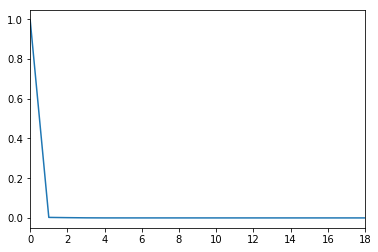

In [25]:
b2 = base_nw.drop(['EXTRELNO'], axis=1)

sc = StandardScaler().fit_transform(b2)
pc = PCA(n_components=19).fit(b2)
pd.Series(pc.explained_variance_ratio_).plot()

In [26]:
pc = PCA(n_components=2).fit_transform(b2)

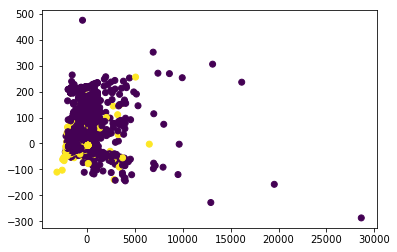

In [27]:
plt.scatter(pc[:,0], pc[:,1], c=b2.Churn)

In [28]:
km = KMeans(n_clusters=2).fit(b2)

# Splitting the base table into Train, Validation & Test

In [29]:
train = b2[b2.STARTYEAR < 2004]
validation = b2[b2.STARTYEAR == 2004]
test = b2[b2.STARTYEAR > 2004]

X_train = train.drop(['Churn'], axis=1)
Y_train = train.Churn

X_validation = validation.drop(['Churn'], axis=1)
Y_validation = validation.Churn

X_test = test.drop(['Churn'], axis=1)
Y_test = test.Churn

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
print 'Train score:' , accuracy_score(lg.predict(X_train), Y_train)

print 'Validation score:' , accuracy_score(lg.predict(X_validation), Y_validation)

print 'Test score:' , accuracy_score(lg.predict(X_test), Y_test)

print 'Confusion matrix for Train: \n' , confusion_matrix(lg.predict(X_train), Y_train)

print 'Confusion matrix for Validation: \n' , confusion_matrix(lg.predict(X_validation), Y_validation)

print 'Confusion matrix for Test: \n' , confusion_matrix(lg.predict(X_test), Y_test)

Train score: 0.934605348989
Validation score: 0.928846153846
Test score: 0.896030245747
Confusion matrix for Train: 
[[5637  313]
 [  88   94]]
Confusion matrix for Validation: 
[[466  22]
 [ 15  17]]
Confusion matrix for Test: 
[[452  38]
 [ 17  22]]


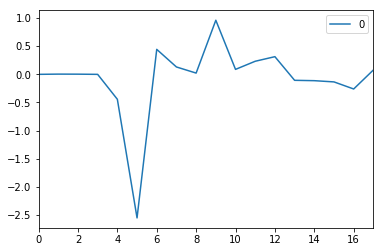

In [32]:
pd.concat([pd.DataFrame(lg.coef_.tolist()).T, pd.DataFrame(X_train.columns)], axis=1).plot()

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, Y_train)

In [34]:
print 'Train score:' , accuracy_score(dt.predict(X_train), Y_train)

print 'Validation score:' , accuracy_score(dt.predict(X_validation), Y_validation)

print 'Test score:' , accuracy_score(dt.predict(X_test), Y_test)

print 'Confusion matrix for Train: \n' , confusion_matrix(dt.predict(X_train), Y_train)

print 'Confusion matrix for Validation: \n' , confusion_matrix(dt.predict(X_validation), Y_validation)

print 'Confusion matrix for Test: \n' , confusion_matrix(dt.predict(X_test), Y_test)

Train score: 1.0
Validation score: 0.973076923077
Test score: 0.962192816635
Confusion matrix for Train: 
[[5725    0]
 [   0  407]]
Confusion matrix for Validation: 
[[474   7]
 [  7  32]]
Confusion matrix for Test: 
[[461  12]
 [  8  48]]


In [35]:
ce = pd.DataFrame(dt.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
ce

,Coefficients
STARTYEAR,0.030699
PAMT_COUNT,0.017154
PAMT_MEAN,0.031006
PAMT_SUM,0.044754
CLASCODE1,0.003452
CONTDIREC1,0.004414
MEDIUMCODE1,0.004265
MNTOPCODE1,0.753925
NAME1TITLE1,0.011392
LANGUACODE1,0.001938


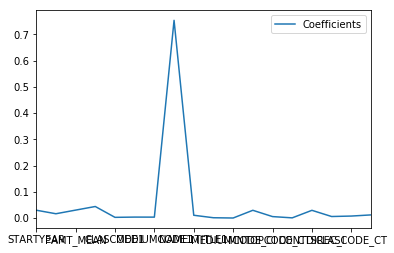

In [36]:
ce.plot()

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, Y_train)

In [38]:
print 'Train score:' , accuracy_score(rf.predict(X_train), Y_train)

print 'Validation score:' , accuracy_score(rf.predict(X_validation), Y_validation)

print 'Test score:' , accuracy_score(rf.predict(X_test), Y_test)

print 'Confusion matrix for Train: \n' , confusion_matrix(rf.predict(X_train), Y_train)

print 'Confusion matrix for Validation: \n' , confusion_matrix(rf.predict(X_validation), Y_validation)

print 'Confusion matrix for Test: \n' , confusion_matrix(rf.predict(X_test), Y_test)

Train score: 0.997879973907
Validation score: 0.961538461538
Test score: 0.954631379962
Confusion matrix for Train: 
[[5723   11]
 [   2  396]]
Confusion matrix for Validation: 
[[465   4]
 [ 16  35]]
Confusion matrix for Test: 
[[453   8]
 [ 16  52]]


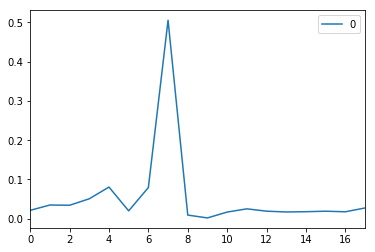

In [39]:
pd.DataFrame(rf.feature_importances_).plot()

In [40]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB().fit(X_train, Y_train)

In [41]:
print 'Train score:' , accuracy_score(nb.predict(X_train), Y_train)

print 'Validation score:' , accuracy_score(nb.predict(X_validation), Y_validation)

print 'Test score:' , accuracy_score(nb.predict(X_test), Y_test)

print 'Confusion matrix for Train: \n' , confusion_matrix(nb.predict(X_train), Y_train)

print 'Confusion matrix for Validation: \n' , confusion_matrix(nb.predict(X_validation), Y_validation)

print 'Confusion matrix for Test: \n' , confusion_matrix(nb.predict(X_test), Y_test)

Train score: 0.933463796477
Validation score: 0.903846153846
Test score: 0.867674858223
Confusion matrix for Train: 
[[5593  276]
 [ 132  131]]
Confusion matrix for Validation: 
[[462  31]
 [ 19   8]]
Confusion matrix for Test: 
[[438  39]
 [ 31  21]]


In [42]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier().fit(X_train, Y_train)

In [43]:
print 'Train score:' , accuracy_score(ad.predict(X_train), Y_train)

print 'Validation score:' , accuracy_score(ad.predict(X_validation), Y_validation)

print 'Test score:' , accuracy_score(ad.predict(X_test), Y_test)

print 'Confusion matrix for Train: \n' , confusion_matrix(ad.predict(X_train), Y_train)

print 'Confusion matrix for Validation: \n' , confusion_matrix(ad.predict(X_validation), Y_validation)

print 'Confusion matrix for Test: \n' , confusion_matrix(ad.predict(X_test), Y_test)

Train score: 0.98385518591
Validation score: 0.975
Test score: 0.964083175803
Confusion matrix for Train: 
[[5696   70]
 [  29  337]]
Confusion matrix for Validation: 
[[475   7]
 [  6  32]]
Confusion matrix for Test: 
[[461  11]
 [  8  49]]


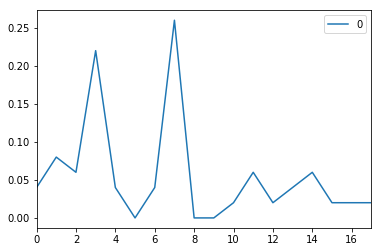

In [44]:
pd.DataFrame(ad.feature_importances_).plot()